In [ ]:
#references
#https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
#https://medium.com/@claude.feldges/text-classification-with-tf-idf-lstm-bert-a-quantitative-comparison-b8409b556cb3


In [3]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [4]:
df = pd.read_csv('combined text data', index_col = 0)
df.head()

,name,strain_type,effect,may_relieve,aromas,flavors,rating,description,fav_count,sativa_comp,indica_comp,cbd,cbn,avg_thc,combined_text
0,s a g e sativa afghani genetic equilibrium ...,hybrid,energizing euphoria happy relaxi...,add adhd anxiety chronic pain de...,earthy herbal sage spicy woo...,sage spicy,4.8,s a g e is a popular marijuana strain that won...,621.0,0.5,0.5,0.00,0.00,0.19,s a g e sativa afghani genetic equilibrium ...
1,cannatonic marijuana strain,hybrid,calming happy mellow relaxing ...,anxiety chronic pain cramps head...,citrus earthy herbal lemon s...,citrus herbal sour spicy swe...,4.7,cannatonic is an evenly balanced hybrid strain...,1535.0,0.5,0.5,0.14,0.01,0.07,cannatonic marijuana strain calming happ...
2,blue dream marijuana strain,sativa dominant hybrid,creative energizing euphoria hap...,add adhd anxiety autism bipolar ...,earthy fruity sweet vanilla,berry blueberry fruity herbal ...,4.5,blue dream is a slightly sativa dominant hybri...,15731.0,0.6,0.4,0.02,0.01,0.17,blue dream marijuana strain creative ene...
3,goji og marijuana strain,sativa dominant hybrid,creative energizing euphoria hap...,chronic pain depression gastrointest...,cherry pungent sweet,berry cherry strawberry sweet ...,4.5,named after the bright red himalayan berry th...,301.0,0.8,0.2,0.01,0.00,0.22,goji og marijuana strain creative energi...
4,green love potion marijuana strain,indica dominant hybrid,aroused happy relaxing sleepy,anxiety chronic pain cramps depr...,earthy floral lavender pungent ...,chemical herbal lavender menthol...,4.5,being an indica dominant hybrid strain green ...,60.0,0.8,0.2,0.00,0.00,0.11,green love potion marijuana strain aroused ...


In [5]:
x = df['description']
y = df['strain_type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [1]:
corpus = x_train

tfidf = TfidfVectorizer(max_features = 15000, ngram_range=(1,2))
tfidf.fit(corpus)


NameError: name 'x_train' is not defined

In [12]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
classifier = LogisticRegression()
model_tfidf = Pipeline([('vectorizer', tfidf), ('classifier', classifier)])

model_tfidf.fit(x_train, y_train)


/Users/issy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=15000, ngram_range=(1, 2))),
                ('classifier', LogisticRegression())])

In [13]:
#assessing the accuracy 

predicted_train_tfidf = model_tfidf.predict(x_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = model_tfidf.predict(x_test)
accuracy_test_tfidf = accuracy_score(y_test, predicted_test_tfidf)
accuracy_tfidf = accuracy_test_tfidf
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))



Accuracy Training data: 96.5%
Accuracy Test data: 91.4%


In [14]:
print('Classes of the model: ',classifier.classes_)
print(80*'-')
print('Shape of the coefficients of the model (categories x vocabulary size): ',classifier.coef_.shape)
print(80*'-')
NN = 10
# Get the 10 (here: NN, which you can adjust yourself) ids of the words with highest weights per category
top_words = np.argsort(classifier.coef_,axis=1)[:,-NN:]

# Get the vocabulary of the model (mapping of words to ids):
voc = tfidf.vocabulary_
# Get the inverse vocabulary to map the ids of the words to the words:
inv_voc = {v: k for k, v in voc.items()}

# Get for each category (=class) the top ten words
for n, w in enumerate(classifier.classes_):
    t = w + ': '
    for i in range(NN):
        t += inv_voc[top_words[n,i]]
        if i!=NN:
            t+=', '
    print(t)
    print(80*'-')

Classes of the model:  ['hybrid' 'indica' 'indica dominant hybrid' 'ruderalis'
 'ruderalis dominant hybrid' 'sativa' 'sativa dominant hybrid']
--------------------------------------------------------------------------------
Shape of the coefficients of the model (categories x vocabulary size):  (7, 15000)
--------------------------------------------------------------------------------
hybrid: strain 50, an evenly, indica 50, 50 sativa, 50 indica, evenly balanced, evenly, balanced hybrid, balanced, 50, 
--------------------------------------------------------------------------------
indica: afghan, kush, rare 100, indica strain, indica hybrid, pure, is 100, 100 pure, 100, pure indica, 
--------------------------------------------------------------------------------
indica dominant hybrid: indica 30, 30 sativa, dominant, 60 indica, dominant hybrid, slightly indica, rare indica, an indica, indica, indica dominant, 
--------------------------------------------------------------------------

In [15]:
knn = KNeighborsClassifier(n_neighbors= 3)
clf = Pipeline([('vectorizer', tfidf), ('knn', knn)])
clf.fit(x_train, y_train)



Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=15000, ngram_range=(1, 2))),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [16]:
predicted_train_tfidf_knn = clf.predict(x_train)
accuracy_train_tfidf_knn = accuracy_score(y_train, predicted_train_tfidf_knn)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf_knn))

predicted_test_tfidf_knn = clf.predict(x_test)
accuracy_test_tfidf_knn = accuracy_score(y_test, predicted_test_tfidf_knn)
accuracy_tfidf = accuracy_test_tfidf_knn
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf_knn))

Accuracy Training data: 76.8%
Accuracy Test data: 57.0%


Minimum error:- 0.2561613144137416 at K = 38


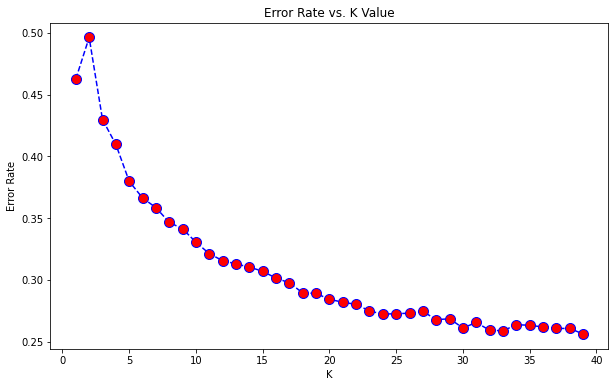

In [17]:
import matplotlib.pyplot as plt 

error_rate = []

for i in range(1,40):
    knn_2 = KNeighborsClassifier(n_neighbors= i)
    clf2 = Pipeline([('vectorizer', tfidf),('classifier', knn_2)])
    clf2.fit(x_train, y_train)
    pred_i = clf2.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
    

Maximum accuracy:- 0.7438386855862584 at K = 0


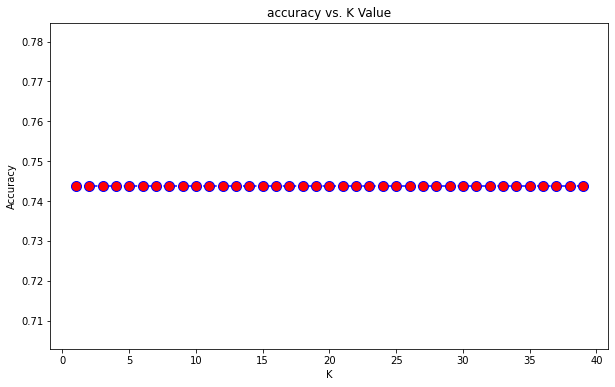

In [20]:
accuracy = []

for i in range(1, 40):
    yhat = clf2.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(accuracy),"at K =",accuracy.index(max(accuracy)))

In [26]:
knn3 = KNeighborsClassifier(n_neighbors= 38)
clf3 = Pipeline([('vectorizer', tfidf), ('knn', knn3)])
clf3.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=15000, ngram_range=(1, 2))),
                ('knn', KNeighborsClassifier(n_neighbors=38))])

In [27]:
predicted_train_tfidf_knn3 = clf3.predict(x_train)
accuracy_train_tfidf_knn3 = accuracy_score(y_train, predicted_train_tfidf_knn3)
print('Accuracy Training data : {:.1%}'.format(accuracy_train_tfidf_knn3))

predicted_test_tfidf_knn3 = clf3.predict(x_test)
accuracy_test_tfidf_knn3 = accuracy_score(y_test, predicted_test_tfidf_knn3)
accuracy_tfidf = accuracy_test_tfidf_knn3
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf_knn3))

Accuracy Training data : 75.4%
Accuracy Test data: 73.9%


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_test_tfidf_knn3, zero_division= 0))

                        precision    recall  f1-score   support

                hybrid       0.75      0.71      0.73       706
                indica       1.00      0.03      0.05        75
indica dominant hybrid       0.72      0.89      0.80      1202
             ruderalis       0.00      0.00      0.00         1
                sativa       0.84      0.28      0.42        58
sativa dominant hybrid       0.78      0.61      0.68       636

              accuracy                           0.74      2678
             macro avg       0.68      0.42      0.45      2678
          weighted avg       0.75      0.74      0.72      2678



In [33]:
print("Accuracy: {}".format(round(accuracy_test_tfidf*100, 4)))
print(classification_report(y_test, predicted_test_tfidf, zero_division= 0))

Accuracy: 91.3742
                        precision    recall  f1-score   support

                hybrid       0.92      0.91      0.91       706
                indica       1.00      0.29      0.45        75
indica dominant hybrid       0.92      0.97      0.94      1202
             ruderalis       0.00      0.00      0.00         1
                sativa       0.95      0.31      0.47        58
sativa dominant hybrid       0.89      0.95      0.92       636

              accuracy                           0.91      2678
             macro avg       0.78      0.57      0.62      2678
          weighted avg       0.92      0.91      0.91      2678

